# Hollywood Movies Exploratory Analysis and Visualization

## Data Wrangling and Exploratory Data Analysis(SP 2022_CAP5320.01 I&T)- Final Project
### Yordanos Jewani
![](https://www.wonderslist.com/wp-content/uploads/2018/12/Highest-Grossing-Hollywood-Movies.jpg)


## Introduction

I have chosen Hollywood Movie data set for analysis. This spreasheet shows you the movies between 2007 and 2013. The dataset has 16 different columns and 970 rows of data. I will be directing the analysis towards finding answers to  the questions below, and in the process hopefully stumble across new insights as well.

Questions about the data:

1. Which studios made the highest number of movies?
2. Find the genre in which there has been the greatest number of movie releases?
3. What are the names of top five movies with highest budget?
4. Find the highest rated movie in the "Love" story type?
5. Is there a relationship between audience rating and profitability?

## Perform data preparation and cleaning

- Load the dataset into a dataframe using Pandas
- Explore the number of rows and columns, ranges of values etc.
- Handle missing, incorrect, and invaild data
- perform any additional steps ( parsing dates, creating additional columns,merging multiple datasets etc.)

In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [688]:
data = pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/HollywoodMovies.csv')
data

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.10,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.60,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.50,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.70,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.10,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,The Canyons,IFC,22.0,NaN,NaN,NaN,1.0,0.01,13351.0,0.06,0.14,0.19,NaN,77.21,NaN,2013
966,The Call,TriStar,43.0,66.0,NaN,NaN,2507.0,17.12,6828.0,51.87,16.70,68.57,13.0,527.48,131.69,2013
967,The English Teacher,Cinedigm Entertainment,42.0,NaN,NaN,NaN,2.0,0.01,3001.0,0.10,0.06,0.10,NaN,NaN,NaN,2013
968,John Dies at the End,Magnolia,61.0,53.0,NaN,NaN,1.0,0.01,12467.0,0.14,NaN,0.14,1.0,14.20,1.00,2013


In [689]:
data.shape

(970, 16)

In [690]:
type(data)

pandas.core.frame.DataFrame

In [691]:
data.columns

Index(['Movie', 'LeadStudio', 'RottenTomatoes', 'AudienceScore', 'Story',
       'Genre', 'TheatersOpenWeek', 'OpeningWeekend', 'BOAvgOpenWeekend',
       'DomesticGross', 'ForeignGross', 'WorldGross', 'Budget',
       'Profitability', 'OpenProfit', 'Year'],
      dtype='object')

In [692]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

## Data Cleaning

Here from the Info we can see we have missing data in some of the columns, I decided to remove missing value for the genre in the process handle other column missing value.

Now we'll make modifications to our dataset. First we'll remove extraneous data and then add and replace information to ensure our dataset is clean for analysis.

- Drop columns that are not relevant to the analysis.
- I'm most concerned with profitability and budget rather than those columns
- Remove outliers using 3𝜎 rule
- Add revenue column to calculate profitability ratio.
- Replace Na value for genre and story to none because I don't want to lose the obesrvations to answer the questions above and fillna('') for numeric columns.

In [693]:
data.drop(['TheatersOpenWeek', 'OpenProfit', 'BOAvgOpenWeekend','OpeningWeekend'], axis=1, inplace=True)
data.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,336.53,554.34,890.87,258.0,345.30,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,322.72,476.24,798.96,160.0,499.35,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,319.25,390.46,709.71,150.0,473.14,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,309.42,654.00,963.42,300.0,321.14,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,292.00,647.88,939.89,150.0,626.59,2007


In [694]:
data.dropna(subset=['Profitability'], inplace= True)
data.dropna(subset=['Budget'], inplace= True)

In [695]:
data['Genre'] = data['Genre'].fillna('none')
data['Story'] = data['Story'].fillna('none')
data['LeadStudio'] = data['LeadStudio'].fillna('none')
data['RottenTomatoes'] = data['RottenTomatoes'].fillna(0)
data['AudienceScore'] = data['AudienceScore'].fillna(0)
data['DomesticGross'] = data['DomesticGross'].fillna(0)
data['ForeignGross'] = data['ForeignGross'].fillna(0)
data['WorldGross'] = data['WorldGross'].fillna(0)

In [696]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 969
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           894 non-null    object 
 1   LeadStudio      894 non-null    object 
 2   RottenTomatoes  894 non-null    float64
 3   AudienceScore   894 non-null    float64
 4   Story           894 non-null    object 
 5   Genre           894 non-null    object 
 6   DomesticGross   894 non-null    float64
 7   ForeignGross    894 non-null    float64
 8   WorldGross      894 non-null    float64
 9   Budget          894 non-null    float64
 10  Profitability   894 non-null    float64
 11  Year            894 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 90.8+ KB


I'd like to add a revenue column so we can create a profitability ratio.

Revenue (aka income) = Profit + budget (aka cost or expense)

In [697]:
data['revenue'] = data['Profitability'] + data['Budget']
data.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,Year,revenue
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,336.53,554.34,890.87,258.0,345.30,2007,603.30
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,322.72,476.24,798.96,160.0,499.35,2007,659.35
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,319.25,390.46,709.71,150.0,473.14,2007,623.14
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,309.42,654.00,963.42,300.0,321.14,2007,621.14
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,292.00,647.88,939.89,150.0,626.59,2007,776.59


Now that we have revenue column, we can create a profitability ratio column.

Profitability ratio = (Profitability/revenue) x 100 = percentage

In [698]:
data['profitability_ratio'] = (data['Profitability'] / (data['revenue'])) * 100
data['profitability_ratio'] = data['profitability_ratio'].astype(int)
data

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,Year,revenue,profitability_ratio
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,336.53,554.34,890.87,258.0,345.30,2007,603.30,57
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,322.72,476.24,798.96,160.0,499.35,2007,659.35,75
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,319.25,390.46,709.71,150.0,473.14,2007,623.14,75
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,309.42,654.00,963.42,300.0,321.14,2007,621.14,51
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,292.00,647.88,939.89,150.0,626.59,2007,776.59,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Girl Most Likely,Roadside Attractions,20.0,35.0,none,none,1.38,0.00,1.38,60.0,2.30,2013,62.30,3
964,The Butler,Weinstein,73.0,79.0,none,none,116.63,51.11,167.74,30.0,559.14,2013,589.14,94
966,The Call,TriStar,43.0,66.0,none,none,51.87,16.70,68.57,13.0,527.48,2013,540.48,97
968,John Dies at the End,Magnolia,61.0,53.0,none,none,0.14,0.00,0.14,1.0,14.20,2013,15.20,93


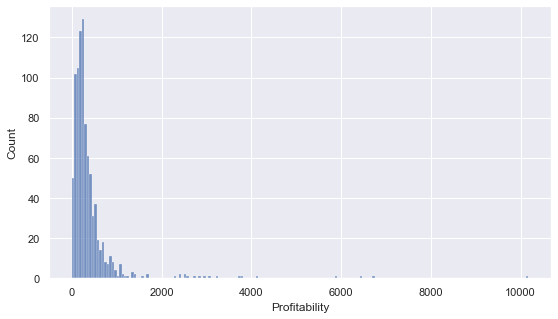

In [699]:
sns.histplot(data=data, x='Profitability');

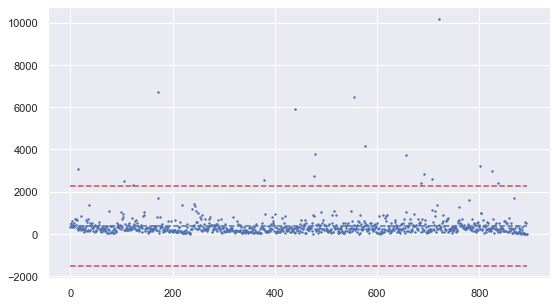

In [700]:
#  Remove the outliers using 3𝜎 rule 
x = np.arange(len(data))
y=data['Profitability']
plt.plot(x, y.mean()+x*0, '--')
plt.plot(x, y.mean()-3*y.std()+x*0, '--',c='r')
plt.plot(x, y.mean()+3*y.std()+x*0, '--', c='r')
plt.scatter(x, y,s=2)

In [701]:
threshold  = data['Profitability'].std()*3
threshold

1896.8044053974502

In [702]:
outliers_df = data[data['Profitability'] > threshold]
outliers_df.shape

(18, 14)

In [703]:
df =data[data['Profitability'] < threshold]
df

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,Year,revenue,profitability_ratio
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,336.53,554.34,890.87,258.0,345.30,2007,603.30,57
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,322.72,476.24,798.96,160.0,499.35,2007,659.35,75
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,319.25,390.46,709.71,150.0,473.14,2007,623.14,75
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,309.42,654.00,963.42,300.0,321.14,2007,621.14,51
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,292.00,647.88,939.89,150.0,626.59,2007,776.59,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Girl Most Likely,Roadside Attractions,20.0,35.0,none,none,1.38,0.00,1.38,60.0,2.30,2013,62.30,3
964,The Butler,Weinstein,73.0,79.0,none,none,116.63,51.11,167.74,30.0,559.14,2013,589.14,94
966,The Call,TriStar,43.0,66.0,none,none,51.87,16.70,68.57,13.0,527.48,2013,540.48,97
968,John Dies at the End,Magnolia,61.0,53.0,none,none,0.14,0.00,0.14,1.0,14.20,2013,15.20,93


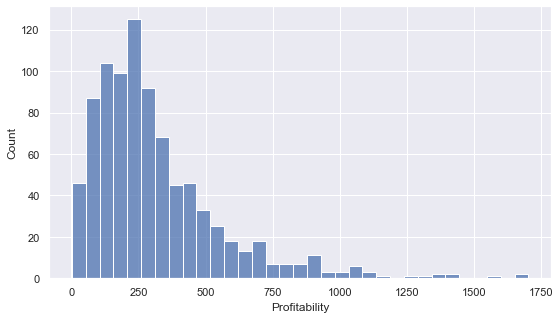

In [704]:
sns.histplot(data=df, x='Profitability');

## Perform exploratory analysis and visualization

- Compute the mean, sum, range, and other interesting statistics for numeric columns 
- Explore distributions of numeric columns using histograms etc. 
- Explore distributions of categorical columns using bar chart etc. 
- Explore relationship between columns using scatter plots, bar charts etc. 
- Summarize your interesting insights from the above exploratory analysis 

In [705]:
df.describe()

,RottenTomatoes,AudienceScore,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,Year,revenue,profitability_ratio
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.00000
mean,51.601598,61.126712,73.206402,99.107955,172.167104,57.311986,312.201644,2010.079909,369.513630,79.83105
std,26.824423,17.035054,82.229554,156.358625,231.022504,53.826318,245.732251,1.952114,248.859034,16.32334
min,0.000000,0.000000,0.140000,0.000000,0.140000,0.200000,2.300000,2007.000000,15.200000,3.00000
25%,28.000000,49.000000,21.367500,14.247500,39.365000,20.000000,147.022500,2008.000000,194.880000,70.00000
50%,52.000000,61.500000,43.975000,44.568500,89.654500,37.000000,251.790000,2010.000000,310.015000,85.00000
75%,75.000000,74.000000,94.885000,110.075000,206.047500,75.000000,396.297500,2012.000000,474.000000,93.00000
max,99.000000,96.000000,760.500000,2021.000000,2781.500000,300.000000,1702.600000,2013.000000,1703.600000,99.00000


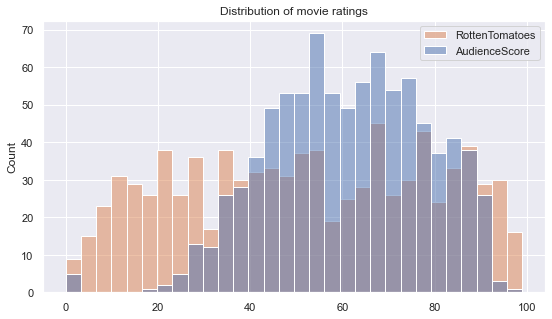

In [706]:
plt.title('Distribution of movie ratings')

sns.histplot([df.AudienceScore, df.RottenTomatoes], bins=30 );

plt.legend(['RottenTomatoes','AudienceScore']);

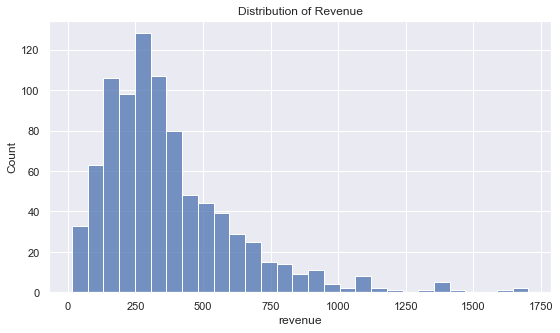

In [707]:
plt.title('Distribution of Revenue')
sns.histplot(data=df, x='revenue');

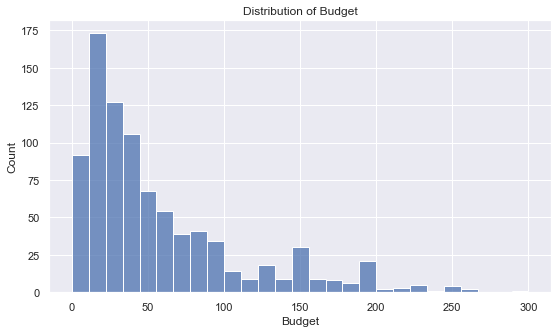

In [708]:
plt.title('Distribution of Budget')
sns.histplot(data=df, x='Budget');

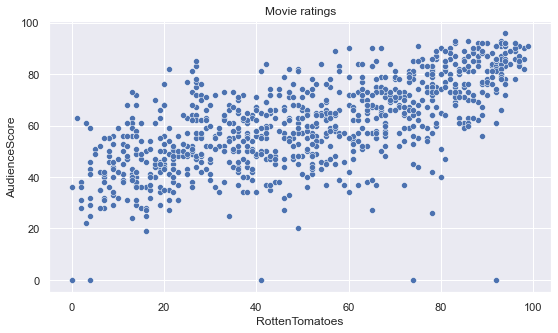

In [709]:
plt.title('Movie ratings')
sns.scatterplot(x=df.RottenTomatoes, y=df.AudienceScore);

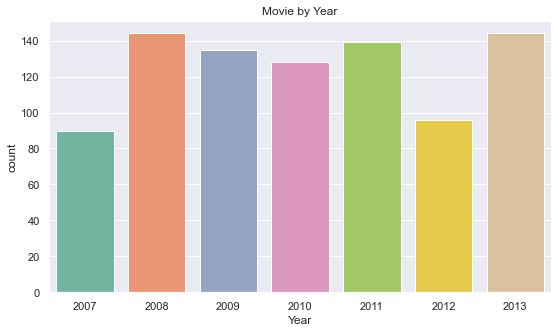

In [710]:
plt.title('Movie by Year')
sns.set(style="darkgrid")
sns.countplot(x="Year", data=df, palette="Set2");

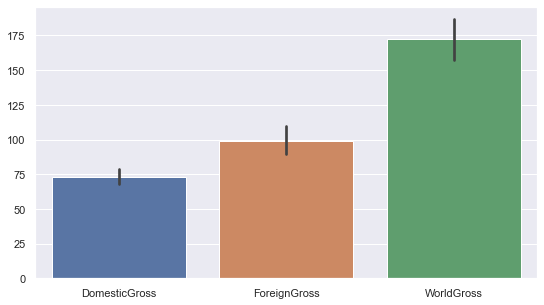

In [711]:
df2=df[['DomesticGross','ForeignGross', 'WorldGross']]
sns.barplot(data=df2);

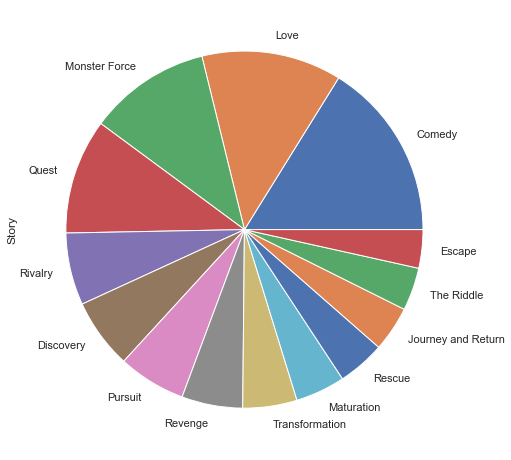

In [712]:
story = df.Story.value_counts().head(15)
story = story[story.index != 'none']
story.plot(kind='pie', figsize=(8,15));

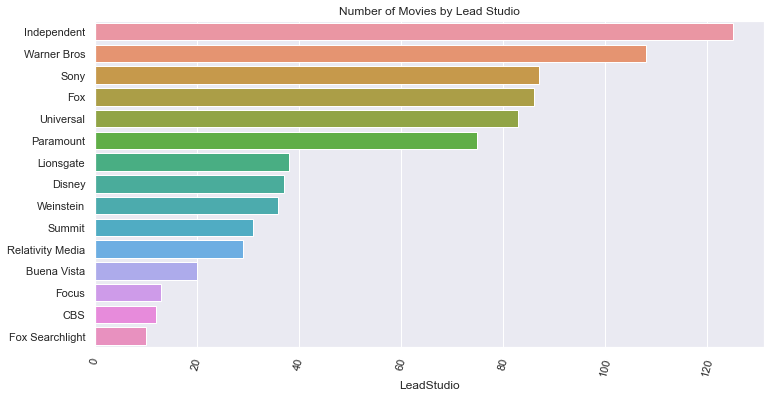

In [713]:
movies = df.LeadStudio.value_counts().head(15)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Number of Movies by Lead Studio')
sns.barplot(y=movies.index, x=movies);

# Ask and answer questions about the data

## 1. Which studios made the highest number of movies?

In [714]:
Studio = df.groupby(['Year'])['LeadStudio'].value_counts()
Studio.groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

Year  LeadStudio      
2007  Paramount           16
      Warner Bros         14
      Independent         13
2008  Independent         28
      Warner Bros         21
      Fox                 15
2009  Warner Bros         20
      Independent         18
      Fox                 17
2010  Independent         39
      Warner Bros         14
      Fox                 12
2011  Independent         27
      Warner Bros         14
      Relativity Media    13
2012  Universal           14
      Sony                12
      Fox                 11
2013  Sony                16
      Warner Bros         16
      Fox                 13
Name: LeadStudio, dtype: int64

* Independent Studio made the highest number of movies from 2007 to 2011 and Warner Bros and Sony are second and thrid place.

## 2. Find the genre in which there has been the greatest number of movie released ?

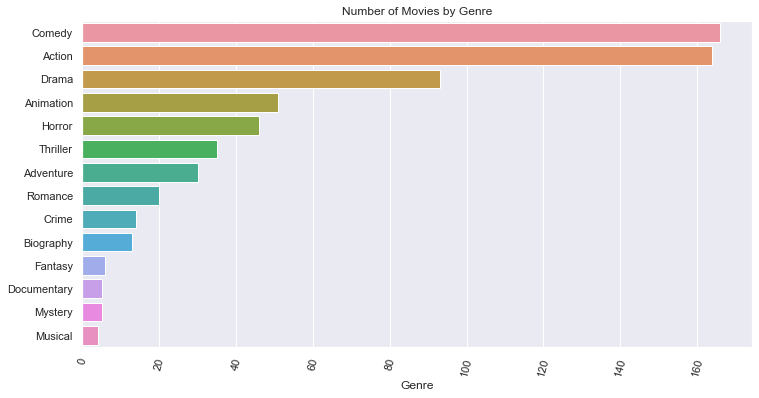

In [715]:
genre = df.Genre.value_counts()
genre = genre[genre.index != 'none']
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Number of Movies by Genre')
sns.barplot(y=genre.index, x=genre);


* The greatest number of movie released were " Comedy" genre.

## 3. What are the names of top five movies with highest budget?

In [716]:
top_five=df[['Movie', 'Budget']].sort_values(by=['Budget'], ascending=False).head(5)


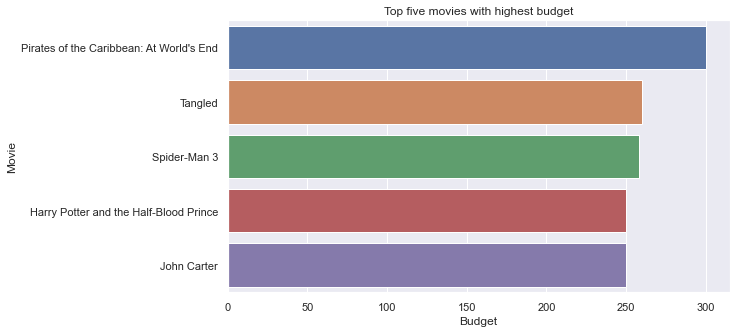

In [717]:
plt.title("Top five movies with highest budget")
sns.barplot(data= top_five, y= "Movie", x="Budget");

## 4. Find the highest rated movie in the "Love" story type? Which genre has the highest rating?

In [735]:
Love=df[df.Story =='Love']

highest_rated=Love[['Movie', 'RottenTomatoes', 'AudienceScore','Story' ]].sort_values(by=['RottenTomatoes','AudienceScore'], ascending=False).head(5)
highest_rated

,Movie,RottenTomatoes,AudienceScore,Story
574,Midnight in Paris,93.0,84.0,Love
19,Enchanted,93.0,80.0,Love
13,Knocked Up,91.0,83.0,Love
468,Tangled,89.0,88.0,Love
76,Waitress,89.0,67.0,Love


* The highest rated movie in "love" story type is "Midnight in Paris".

In [753]:
highest_rated1=df[['Movie', 'RottenTomatoes', 'AudienceScore','Genre' ]].sort_values(by=['RottenTomatoes','AudienceScore'], ascending=False).head(5)
highest_rated1

,Movie,RottenTomatoes,AudienceScore,Genre
499,Toy Story 3,99.0,91.0,Animation
419,How to Train Your Dragon,98.0,90.0,Animation
243,Up,98.0,86.0,Animation
941,Before Midnight,98.0,82.0,none
611,The Artist,97.0,91.0,Drama


Genre that has the highest rating is "Animation".

## 5. Is there a relationship between audience rating and profitiability? Which genre has the highest profitability?

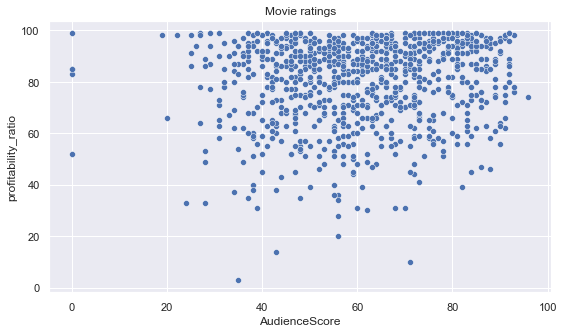

In [751]:
plt.title('Movie ratings')
sns.scatterplot(x=df.AudienceScore, y=df.profitability_ratio);

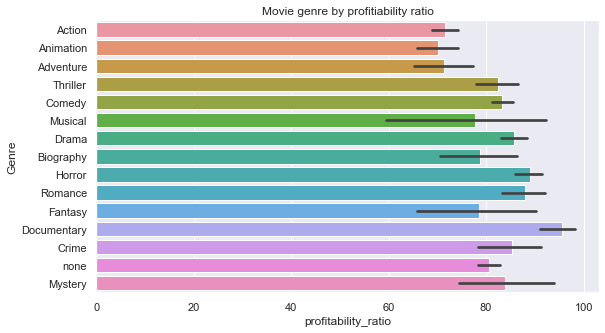

In [750]:
plt.title("Movie genre by profitiability ratio")
sns.barplot(x=df.profitability_ratio, y=df.Genre);

The relationship between profitability ratio and rating is when audience score increase, the profitability also increase and more packed. "Documentary" genre has the highest profitability. 

## Summary

I have covered the following in the project:
- Loading and cleaning dataset using Pandas
- Correcting outliers using 3𝜎 rule
- Visualizing relationships between two or more variables using scatter plots
- Distributions of variables using histograms & bar charts to
- Plotting Matplotlib and Seaborn charts

In this project, interesting thing I noticed was that Comedy movies we the most frequently produced movies, while the highest rated genre is Animation movie. so, this is something to look more into, We can just ask the reason why is we produce more Comedy movies while audience rating indicate people are more interested in Animation Movies?


References used:

* Python Graph: https://python-graph-gallery.com/10-barplot-with-number-of-observation
* Seaborn gallery: https://seaborn.pydata.org/examples/index.html
* Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html